In [4]:
#importing the  csv file
import pandas as pd
from matplotlib import pyplot as plt
import os
df=pd.read_csv(r'kaggle_survey_2021_responses.csv')
df.head()

C:\Users\shado\AppData\Local\Temp\ipykernel_15244\569813301.py:5: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'kaggle_survey_2021_responses.csv')


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [5]:
#making the questions into a different variable and delting it to clean the df
questions=df.iloc[0,:]
questions
df1=df.drop(index=0)

In [6]:
#converting  all int columns from object to int to ease mathematical operations
for  i in df1.columns :
    if df1[i].str.isnumeric().all():
        df1[i]=pd.to_numeric(df1[i])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 1 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: float64(8), int64(1), object(360)
memory usage: 73.1+ MB


In [7]:
#getting list of all arab countries
ountriesarabs='Algeria,Bahrain,Egypt,Iraq,Jordan,Kuwait,Lebanon,Libya,Mauritania,Morocco,Oman,Palestine,Qatar,Saudi Arabia,Sudan,Syria,Tunisia,United Arab Emirates,Yemen'
arab_countries=ountriesarabs.split(',')


#Making a variable for just arabs and non arabs
arabs_cols=df1[df1['Q3'].isin(arab_countries)]
non_arab_cols=df1[df1['Q3'].isin(arab_countries)==False]


Text(0.5, 1.0, 'Arabs to non arabs')

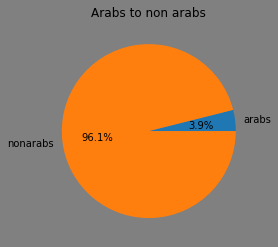

In [52]:
s=arabs_cols['Q1'].count()
ss=non_arab_cols['Q1'].count()
sss=[s,ss]
ssss=['arabs','nonarabs']
fig,axes=plt.subplots()
fig.patch.set_facecolor('grey')
axes.pie(sss ,labels=ssss,autopct='%1.1f%%')
axes.set_title('Arabs to non arabs')

                       ****************AGE DISTRIBUTION**********************


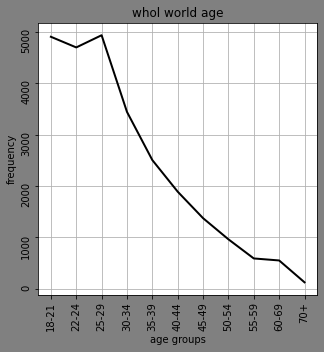

In [8]:
print ('                       ****************AGE DISTRIBUTION**********************')
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5)) 
fig.patch.set_facecolor('grey')

arabsagegroups=arabs_cols['Q1'].value_counts().sort_index()
x=arabsagegroups.index
y=arabsagegroups.values

 ## '''arab ages '''
# axes[0].set_title('arab countries age')
# axes[0].set_xlabel('age groups')
# axes[0].set_ylabel('frequency')
# axes[0].plot(x,y,color='blue' ,lw=2 )
# axes[0].grid(True)
# axes[0].tick_params(labelrotation=90)
## '''non arab age distribution'''
# nonarabsagegroups=non_arab_cols['Q1'].value_counts().sort_index()
# x=nonarabsagegroups.index
# y=nonarabsagegroups.values
# axes[1].set_title('non arab countries age')
# axes[1].set_xlabel('age groups')
# axes[1].set_ylabel('frequency')
# axes[1].plot(x,y ,color='red' ,lw=2 )
# axes[1].grid(True)
# axes[1].tick_params(labelrotation=90)

wholeworldagegroups=df1['Q1'].value_counts().sort_index()
x=wholeworldagegroups.index
y=wholeworldagegroups.values
axes.set_xlabel('age groups')
axes.set_title('whol world age')
axes.set_ylabel('frequency')
axes.plot(x,y,color='black' ,lw=2 )
axes.grid(True)
axes.tick_params(labelrotation=90)



In [9]:
#percentage of bachelors pie chart
# males to females  pie chart
#arab count vs non arabs     pie chart
#students to non            pie chart
#programming languages count      barchart
#Q11                bar/hist
#Q14                        bar

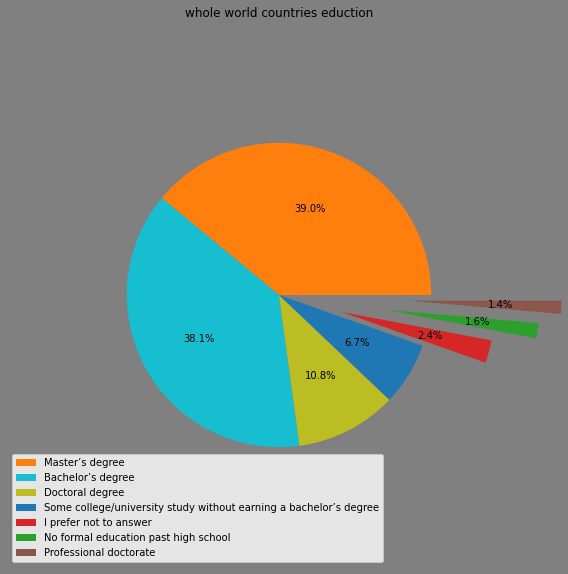

In [28]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,10)) 
fig.patch.set_facecolor('grey')
explode=[0,0,0,0,0.3,0.5,0.6]
colors= ['tab:orange', 'tab:cyan', 'tab:olive', 'tab:blue', 'tab:red', 'tab:green','tab:brown']

##'''arabs education'''
# arabsgrad=arabs_cols['Q4'].value_counts().sort_values(ascending=False)
# axes[0].set_title('arab countries eduction')
# axes[0].pie(arabsgrad,autopct='%1.1f%%' ,explode=explode ,colors=colors)
# axes[0].legend(labels=arabsgrad.index,fontsize=7,loc='lower left')
##'''non arabs education'''
# nonarabsgrad=non_arab_cols['Q4'].value_counts().sort_values(ascending=False)
# axes[1].set_title('non arab countries eduction')
# axes[1].pie(nonarabsgrad,autopct='%1.1f%%',explode=explode ,colors=colors)
# axes[1].legend(labels=nonarabsgrad.index ,fontsize=7,loc='lower left')

wholeworldeducation=df1['Q4'].value_counts().sort_values(ascending=False)

axes.set_title('whole world countries eduction')
axes.pie(wholeworldeducation,autopct='%1.1f%%',explode=explode ,colors=colors,radius=0.7)
axes.legend(labels=wholeworldeducation.index ,fontsize=10,loc='lower left')



In [49]:
#renaming genres
others=df1['Q2'].replace(['Prefer not to say','Nonbinary','Prefer to self-describe'],'other')
others

1        Man
2        Man
3        Man
4        Man
5        Man
        ... 
25969    Man
25970    Man
25971    Man
25972    Man
25973    Man
Name: Q2, Length: 25973, dtype: object

Text(0.5, 1.0, 'whole world countries eduction')

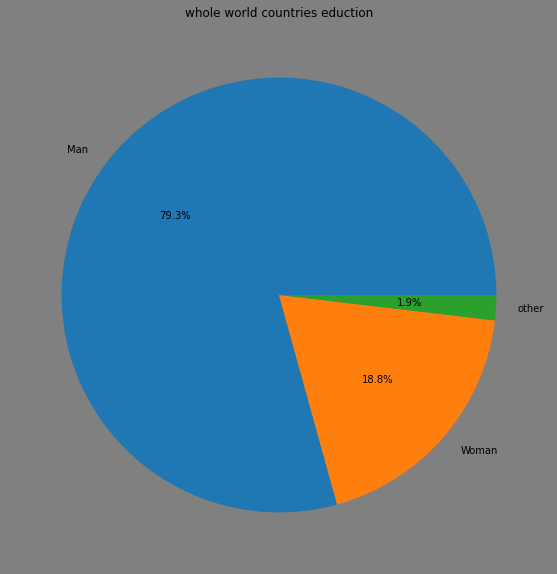

In [50]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10)) 
fig.patch.set_facecolor('grey')


##'''arabs gender'''
# arabsgender=arabs_cols['Q2'].value_counts().sort_values(ascending=False)
# axes[0].set_title('arab countries gender')
# axes[0].pie(arabsgender,labels=arabsgender.index,autopct='%1.1f%%' ,explode=explode)
##'''non arabs gender'''
# explode=[0,0,0.3,0.4,0.6]
# nonarabsgender=non_arab_cols['Q2'].value_counts().sort_values(ascending=False)
# axes[1].set_title('non arab countries gender')
# axes[1].pie(nonarabsgender,labels=nonarabsgender.index ,autopct='%1.1f%%',explode=explode)

wholeworldgender=others.value_counts().sort_values(ascending=False)


axes.pie(wholeworldgender,labels=wholeworldgender.index,autopct='%1.1f%%')
axes.set_title('whole world countries eduction')

Text(0, 0.5, 'profession')

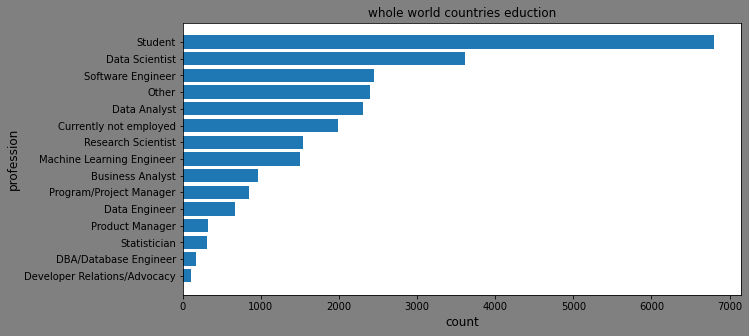

In [65]:
from matplotlib import font_manager as fm
non_arab_cols['Q5'].value_counts().sort_values()

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,5)) 
fig.patch.set_facecolor('grey')
# explode=[0,0,0,0,0.3,0.5,0.6]
##'''Arabs profession'''
# arabsprofession=arabs_cols['Q5'].value_counts().sort_values()
# axes[0].set_title('arab countries profeesions')
# axes[0].pie(arabsprofession,autopct='%1.1f%%',textprops={"fontsize":8},radius=0.6 )
# axes[0].legend(labels=arabsprofession.index,fontsize=6,loc='lower left')
##'''non arabs profession'''
# nonarabsgrad=non_arab_cols['Q5'].value_counts().sort_values()
# axes[1].set_title('non arab countries eduction')
# axes[1].pie(nonarabsgrad,autopct='%1.1f%%',textprops={"fontsize":8},radius=0.6)
# axes[1].legend(labels=nonarabsgrad.index ,fontsize=6,loc='lower left')

wholeworldprofession=df1['Q5'].value_counts().sort_values()



axes.barh(wholeworldprofession.index,wholeworldprofession  )
axes.set_title('whole world countries eduction',fontsize=12)
axes.set_xlabel('count',fontsize=12)
axes.set_ylabel('profession',fontsize=12)


Text(0, 0.5, 'no.of users')

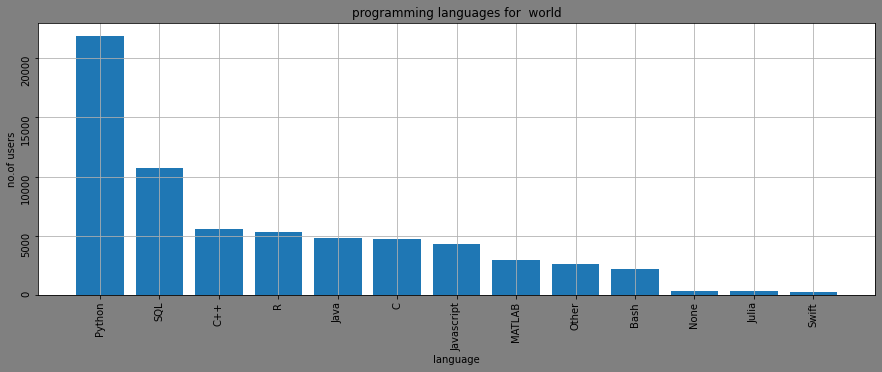

In [72]:
import operator
#programming languages in arab countries     
# Arabs and non arabs are commented   
# lan_arabs=arabs_cols.columns[arabs_cols.columns.str.contains('Q7')]
# lan_non_arabs=non_arab_cols.columns[arabs_cols.columns.str.contains('Q7')]
lan_whole_world=df1.columns[arabs_cols.columns.str.contains('Q7')]
# dic7q={}
# duc8q={}
dic9q={}
# for  col in lan_arabs:
#     key=arabs_cols[col].value_counts().index[0]
#     dic7q[key]=arabs_cols[col].value_counts()[0]
# dic7q=pd.Series(dic7q)
# for  col in lan_non_arabs:
#     key=non_arab_cols[col].value_counts().index[0]
#     duc8q[key]=non_arab_cols[col].value_counts()[0]
# duc8q=pd.Series(duc8q)

for  col in lan_whole_world:
    key=df1[col].value_counts().index[0]
    dic9q[key]=df1[col].value_counts()[0]
dic9q=dict(sorted(dic9q.items()  ,key=operator.itemgetter(1),reverse=True))    
dic9q=pd.Series(dic9q)

fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(15,5))
fig.patch.set_facecolor('grey')
# axis[0].bar(dic7q.index,dic7q.values,color='green')
# axis[0].grid(True)
# axis[0].tick_params(labelrotation=90)
# axis[0].set_title('programming languages for arabs')
# axis[0].set_xlabel('language')
# axis[0].set_ylabel('no.of users')
# axis[1].bar(duc8q.index,duc8q.values)
# axis[1].grid(True)
# axis[1].tick_params(labelrotation=90)
# axis[1].set_title('programming languages for  non arabs')
# axis[1].set_xlabel('language')
# axis[1].set_ylabel('no.of users')

axis.bar(dic9q.index,dic9q.values)
axis.grid(True)
axis.tick_params(labelrotation=90)
axis.set_title('programming languages for  world')
axis.set_xlabel('language')
axis.set_ylabel('no.of users')

{'Python': 21860,
 'R': 5334,
 'SQL': 10756,
 'C': 4709,
 'C++': 5535,
 'Java': 4769,
 'Javascript': 4332,
 'Julia': 305,
 'Swift': 242,
 'Bash': 2216,
 'MATLAB': 2935,
 'None': 319,
 'Other': 2575}